# Threshold

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu

plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [2]:
data = pd.read_csv(
    './../data/train/orig_pcc_prep.csv', sep=',', index_col=0
)

In [3]:
data.head()

,cg00002224,cg00002426,cg00002593,cg00002719,cg00003287,cg00003529,cg00004883,cg00005112,cg00005215,cg00006459,...,cg27655507,cg27656362,cg27657226,cg27658601,cg27659557,cg27660388,cg27660627,cg27661394,cg27662481,cg27664530
TNFRSF4,0.152158,0.421587,0.510220,-0.098727,-0.161352,0.193672,-0.125737,0.143610,0.331339,0.368013,...,0.032494,-0.237272,-0.279078,0.058243,-0.363771,0.246375,0.498987,-0.090004,0.186760,-0.387554
MXRA8,-0.189451,-0.120793,0.064646,-0.010347,0.037815,0.108564,-0.003084,-0.190509,0.180490,-0.126560,...,-0.068296,-0.041532,-0.232770,0.037444,-0.044510,0.029217,-0.193969,-0.371675,0.251709,-0.080120
ATAD3A,0.360949,0.215500,0.138549,-0.216944,-0.362784,0.282900,-0.434567,-0.157029,0.320902,0.402007,...,0.263060,-0.369994,-0.163194,-0.278221,-0.399825,0.289896,0.150499,-0.088815,0.261527,-0.338759
MMP23B,-0.006127,-0.056735,0.033760,-0.173229,-0.028188,0.110460,0.148969,-0.344462,0.169890,-0.146187,...,-0.005750,-0.005554,-0.256050,-0.061528,-0.122920,-0.067338,-0.213146,-0.295521,0.156659,-0.070179
SLC35E2,-0.360446,-0.231153,-0.361040,0.386536,0.317003,-0.557427,0.252353,0.286910,-0.378933,-0.210208,...,-0.308470,0.489854,0.375911,0.295297,0.335944,-0.499041,-0.124968,0.287670,-0.270959,0.578377


## OTSU

Apply OTSU algorithm to test for optimal threshold value.

In [7]:
# QUESTION: Increasing nbins = better estimates?
thresh = threshold_otsu(data.values, nbins=200)

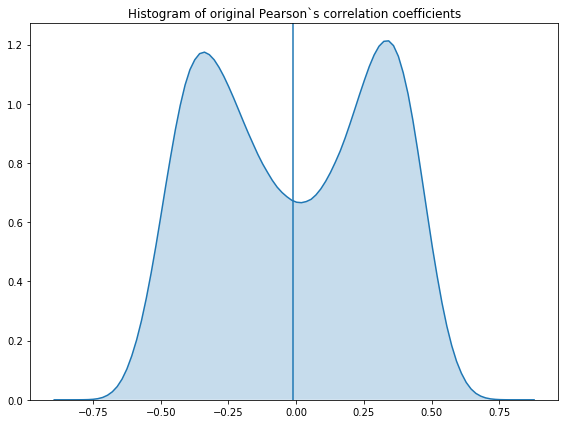

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Pearson`s correlation coefficients')
sns.kdeplot(data.values.ravel(), shade=True)
plt.axvline(x=thresh)
plt.tight_layout()

## Filter

In [29]:
upper, lower = data.copy(), data.copy()

lower.values[data.values < thresh] = np.nan
upper.values[data.values >= thresh] = np.nan

In [30]:
lower

,cg00002224,cg00002426,cg00002593,cg00002719,cg00003287,cg00003529,cg00004883,cg00005112,cg00005215,cg00006459,...,cg27655507,cg27656362,cg27657226,cg27658601,cg27659557,cg27660388,cg27660627,cg27661394,cg27662481,cg27664530
TNFRSF4,0.152158,0.421587,0.510220,NaN,NaN,0.193672,NaN,0.143610,0.331339,0.368013,...,0.032494,NaN,NaN,0.058243,NaN,0.246375,0.498987,NaN,0.186760,NaN
MXRA8,NaN,NaN,0.064646,-0.010347,0.037815,0.108564,-0.003084,NaN,0.180490,NaN,...,NaN,NaN,NaN,0.037444,NaN,0.029217,NaN,NaN,0.251709,NaN
ATAD3A,0.360949,0.215500,0.138549,NaN,NaN,0.282900,NaN,NaN,0.320902,0.402007,...,0.263060,NaN,NaN,NaN,NaN,0.289896,0.150499,NaN,0.261527,NaN
MMP23B,-0.006127,NaN,0.033760,NaN,NaN,0.110460,0.148969,NaN,0.169890,NaN,...,-0.005750,-0.005554,NaN,NaN,NaN,NaN,NaN,NaN,0.156659,NaN
SLC35E2,NaN,NaN,NaN,0.386536,0.317003,NaN,0.252353,0.286910,NaN,NaN,...,NaN,0.489854,0.375911,0.295297,0.335944,NaN,NaN,0.287670,NaN,0.578377
MORN1,NaN,NaN,NaN,0.300400,0.261383,NaN,0.267962,0.236497,NaN,NaN,...,NaN,0.441890,0.335597,0.278736,0.402196,NaN,NaN,0.222566,NaN,0.538454
KCNAB2,0.243516,0.393258,0.497420,NaN,NaN,0.282051,0.012415,NaN,0.418157,0.360013,...,0.150282,NaN,NaN,NaN,NaN,0.215378,0.401990,NaN,0.162186,NaN
KLHL21,0.338285,0.060723,-0.003009,NaN,NaN,0.149602,NaN,NaN,0.301182,0.129668,...,0.440805,NaN,NaN,NaN,NaN,0.158979,NaN,NaN,0.167898,NaN
TNFRSF9,0.281330,0.517126,0.554577,NaN,NaN,0.340176,NaN,-0.000860,0.418998,0.404657,...,0.138372,NaN,NaN,NaN,NaN,0.253130,0.566684,NaN,0.245147,NaN
ENO1,0.271442,0.123755,0.101155,NaN,NaN,0.414863,NaN,NaN,0.439926,0.272295,...,0.352967,NaN,NaN,NaN,NaN,0.424210,0.091748,NaN,0.402000,NaN
